encoding approach

## 1. one-hot encodings
"one-hot" encode each world in vocabulary; 

please not the 1 value (x<sub>i</sub>=y<sub>i</sub>)

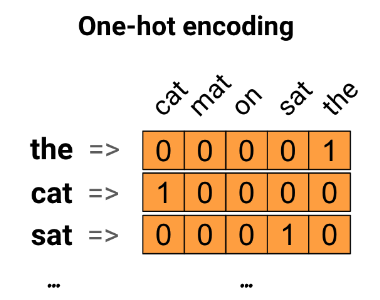

**Note**
a **one-hot** encoded vector is **sparse** (meaning, most indices are zero). image you have 10,000 words in the vocabulary, to one-hot encode each word, you would create a vector where 99.99% of the elements are zero. 

## 2. encode each word with a unique number 
encode each word using a unique number. this is a **dense** vector, where all elements are full. 

two downsides:
- the integer-encoding is arbitrary (it does not capture any relationship between words)
- an integer-encoding can be challenging for a model to interpret. a liner classifier, learns a single weight for each feature; because there is no relationship between the similarity of any two words (and the similarity of their encodings), this feature-weight combination is not meaningful. 

### 3. word embeddings 
wording embeddings give us a way to use an efficient, dense representation in which similar words have a similar encoding. 

an embedding is a dense vector of floating point values. 

instead of specifying the value (dense vector value) for the embedding manually, they are trainable parameters (weights learned by the model during training, in the same way a model learns weight for a dense layer).

embedding dimension varies from 8 dimensions to 1024 dimensions. (higher dimensional embedding can capture fine-grained relationship between words, take takes more data to learn.)

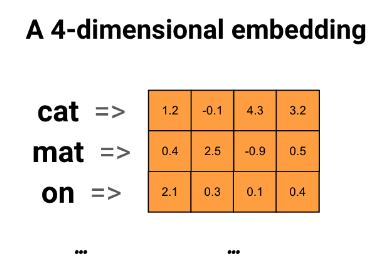

vector
cat: [1. 0. 0. 0. 0. 0. 0. 0.]
dog: [0. 1. 0. 0. 0. 0. 0. 0.]
mouse: [0. 0. 1. 0. 0. 0. 0. 0.]
fish: [0. 0. 0. 1. 0. 0. 0. 0.]
bird: [0. 0. 0. 0. 1. 0. 0. 0.]
orange: [0. 0. 0. 0. 0. 1. 0. 0.]
banana: [0. 0. 0. 0. 0. 0. 1. 0.]
shark: [0. 0. 0. 0. 0. 0. 0. 1.]
embedding
cat: [-0.63590443 -0.7674831  -1.1621428 ]
dog: [0.04208311 0.14442086 1.4553277 ]
mouse: [ 0.48541424 -0.43644813  1.4532136 ]
fish: [ 0.10675738 -0.8341545   1.2859285 ]
bird: [-0.15123847  1.4660324   1.4768133 ]
orange: [-1.9122831  0.9616967  1.4322644]
banana: [0.82913995 0.29473308 0.61796397]
shark: [ 0.5958962  -0.36994722 -1.2387832 ]


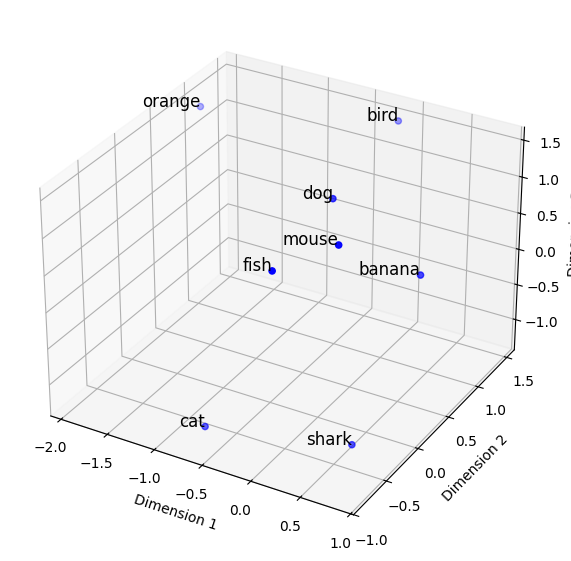

In [ ]:
# vector vs embedding in pytorch

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vocab = ['cat', 'dog', 'mouse', 'fish', 'bird', 'orange', 'banana', 'shark']
vectors = np.eye(len(vocab))
print('vector')
for word, vector in zip(vocab, vectors):
    print(f'{word}: {vector}')


embedding_dim = 3
embedding_layer = nn.Embedding(num_embeddings=len(vocab), embedding_dim=embedding_dim)

word_indecies = torch.LongTensor([0,1,2,3,4,5,6,7])
word_embeddings = embedding_layer(word_indecies)
print('embedding')
for word, embedding in zip(vocab, word_embeddings):
    print(f'{word}: {embedding.detach().numpy()}')

# visual embedding
word_embeddings = word_embeddings.detach().numpy()
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
x, y, z = word_embeddings[:, 0], word_embeddings[:, 1], word_embeddings[:, 2]
ax.scatter(x, y, z, c='b', marker='o')

# Label each point
for i, word in enumerate(vocab):
    ax.text(x[i], y[i], z[i], word, fontsize=12, ha='right')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()


Basic Vectors (Random):
apple: [0.27134844 0.95155137 0.2781329  0.16505059 0.98630972]
banana: [0.69755111 0.96396383 0.11829419 0.78884223 0.5455134 ]
cat: [0.9067979  0.04621437 0.44604828 0.25147956 0.15518915]
dog: [0.45138534 0.24714242 0.60644307 0.22774038 0.41263223]
dove: [0.88313955 0.6397703  0.29379257 0.76598142 0.78336561]
fish: [0.50155434 0.52084064 0.25809457 0.78401531 0.14972385]
hawk: [0.15825708 0.66104789 0.84445923 0.53588029 0.37798457]
lamprey: [0.51856566 0.86017262 0.13094814 0.9268924  0.99575086]
mouse: [0.22003876 0.61520083 0.91013724 0.5451111  0.6313366 ]
orange: [0.31773968 0.29830021 0.48572057 0.38535664 0.35287123]
owl: [0.06779612 0.25701467 0.55789166 0.32981496 0.65624165]
shark: [0.99539288 0.44083849 0.76336008 0.82075863 0.61677158]

Learned Embeddings:
apple: [-0.01088674  0.00487753  0.10202133  0.18025874 -0.18607858]
banana: [-0.14233302  0.12917605  0.17942967 -0.1003617  -0.07521256]
cat: [-0.0896629   0.09043149 -0.13550311 -0.0711177 

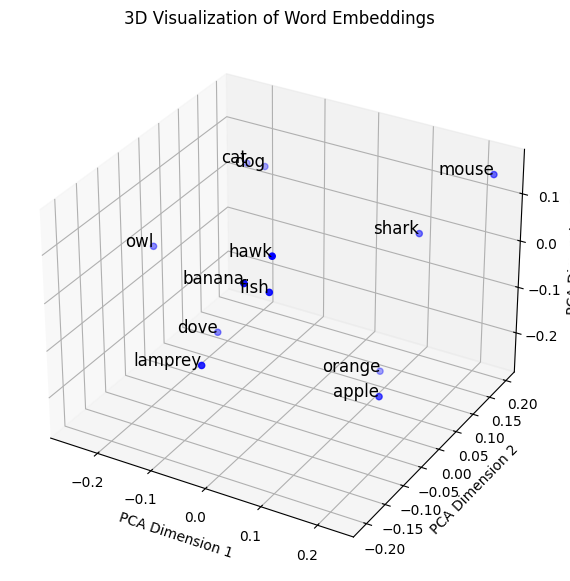

In [37]:
# %pip install gensim

from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Define a simple dataset
# Sentences with repetitive patterns to train simple embeddings
sentences = [
    ['cat', 'dog', 'mouse'],
    ['owl', 'dove', 'hawk'],
    ['fish', 'shark', 'lamprey'],
    ['orange', 'banana', 'apple']
]

# Step 2: Define one-hot encoding (basic vector) for each word
# Vocabulary of unique words
vocab = sorted({word for sentence in sentences for word in sentence})
# one_hot_vectors = {word: np.eye(len(vocab))[i] for i, word in enumerate(vocab)}
random_vectors = {word: np.random.rand(5) for word in vocab}

print("Basic Vectors (Random):")
for word, vec in random_vectors.items():
    print(f"{word}: {vec}")

# Step 3: Train a Word2Vec model to learn embeddings
# Using a small embedding size for simplicity
embedding_dim = 5
word2vec_model = Word2Vec(sentences, vector_size=embedding_dim, min_count=1, epochs=100)

# Step 4: Retrieve and display embeddings
embeddings = {word: word2vec_model.wv[word] for word in vocab}

print("\nLearned Embeddings:")
for word, emb in embeddings.items():
    print(f"{word}: {emb}")

# Step 5: Visualize the embeddings in 3D space
# We use PCA in case the embedding dimension is greater than 3
pca = PCA(n_components=3)
embedding_matrix = np.array(list(embeddings.values()))
embedding_matrix_3d = pca.fit_transform(embedding_matrix)

# Plot the embeddings
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
x, y, z = embedding_matrix_3d[:, 0], embedding_matrix_3d[:, 1], embedding_matrix_3d[:, 2]

ax.scatter(x, y, z, color='b', marker='o')
for i, word in enumerate(vocab):
    ax.text(x[i], y[i], z[i], word, fontsize=12, ha='right')

ax.set_xlabel("PCA Dimension 1")
ax.set_ylabel("PCA Dimension 2")
ax.set_zlabel("PCA Dimension 3")
plt.title("3D Visualization of Word Embeddings")
plt.show()


vector for pup: [ 0.14443028 -0.48793197 -0.2670264   0.19100471  0.48342505  0.25445572
  0.70908946  0.02340868 -0.00714417 -1.1996142 ]
vector for puppy: [-0.21688621 -0.57105154 -0.37596247  0.54214865  0.60846114  0.2765395
  0.7834112  -0.05949177  0.1527185  -1.1555076 ]
vector for book: [-0.8360881   0.2724647  -0.04161454 -0.8258049   0.90546036 -0.27237308
  0.41792297  0.27781484 -0.22072595 -0.95670813]
vector for poem: [-0.52180463 -0.1371243   0.18072434  0.16613062  0.45934606  0.24869134
  0.82080704  0.3064619  -0.4343283  -0.65564877]
vector for airplane: [-0.36875686  0.8401734  -0.24398635  0.6057268   0.35659996  0.23017354
  0.5498118  -0.00620998 -0.7977459  -1.2572304 ]
vector for train: [ 0.05224381 -0.29308048  0.10388285  0.95896226  0.28085807  0.13523196
  1.4847703   0.2292248  -0.27982187 -1.0506665 ]
vector for how are you: [ 0.5277302   0.41549188  0.22743073 -0.41837764  0.41377535  0.28140673
  0.3372964   0.6723536  -0.7496682  -1.1269433 ]
vector fo

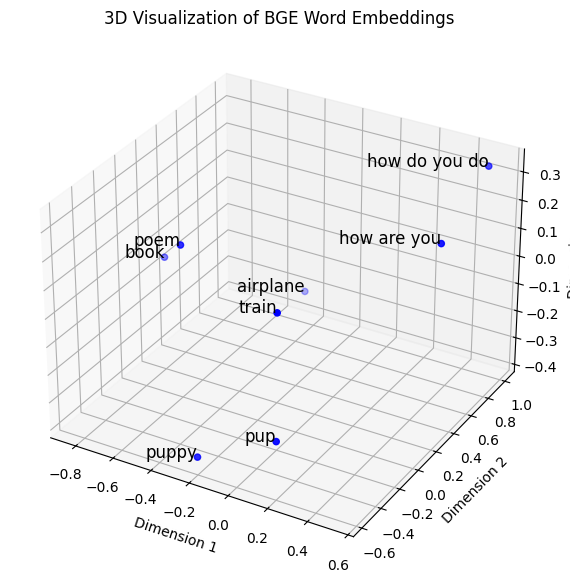

In [31]:
# a meaning full demo 
# https://medium.com/@fareedkhandev/understanding-transformers-a-step-by-step-math-example-part-1-a7809015150a

# %pip install transformers torch matplotlib

import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from transformers import AutoTokenizer, AutoModel

# Step 1: Load the BGE model and tokenizer
model_name = "BAAI/bge-base-en-v1.5"  # Replace with the correct model name if necessary
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

# Step 2: Create a simple dataset
vocab = ['pup', 'puppy', 'book', 'poem', 'airplane', 'train', 'how are you', 'how do you do']

# Step 3: Generate vectors and embeddings for each word
embeddings = []
with torch.no_grad():
    for word in vocab:
        inputs = tokenizer(word, return_tensors="pt")
        outputs = model(**inputs)

        # Use the last hidden state or pooled output as the embedding
        vector = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        embeddings.append(vector)

        print(f'vector for {word}: {vector[:10]}') # just 10 dim for demo

# Convert to a NumPy array
embeddings = np.array(embeddings)

print("\nEmbeddings for each word:")
for word, embedding in zip(vocab, embeddings):
    print(f"{word}: {embedding[:10]}")


# Step 4: Visualize the embeddings in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Create a 3D scatter plot
ax.scatter(x, y, z, c='b', marker='o')

# Label each point with the word it represents
for i, word in enumerate(vocab):
    ax.text(x[i], y[i], z[i], word, fontsize=12, ha='right')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D Visualization of BGE Word Embeddings')
plt.show()

In [ ]:
# gpt2 tokenizer

from transformers import GPT2Tokenizer, GPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = "Replace `context` by any text you'd like!"

# encode each word with a unique number 
encoded_input = tokenizer(text, return_tensors='pt') 

token_ids = encoded_input['input_ids']
tokens = [tokenizer.decode(id) for id in encoded_input['input_ids']]

for token_id in token_ids[0]:
    print(f'token id:{token_id}; token:{tokenizer.decode(token_id)}')

print('all token ids', token_ids)

print('all vocab of gpt2')
# Get the vocabulary (token-to-ID mapping)
vocab = tokenizer.get_vocab()

# Sort by token ID to make it easier to read
sorted_vocab = dict(sorted(vocab.items(), key=lambda item: item[1]))

# Display the vocabulary
for token, token_id in sorted_vocab.items():
    print(f"Token: {token}, ID: {token_id}")

token id:3041; token:Re
token id:5372; token:place
token id:4600; token: `
token id:22866; token:context
token id:63; token:`
token id:416; token: by
token id:597; token: any
token id:2420; token: text
token id:345; token: you
token id:1549; token:'d
token id:588; token: like
token id:0; token:!
all token ids tensor([[ 3041,  5372,  4600, 22866,    63,   416,   597,  2420,   345,  1549,
           588,     0]])
all vocab of gpt2
Token: !, ID: 0
Token: ", ID: 1
Token: #, ID: 2
Token: $, ID: 3
Token: %, ID: 4
Token: &, ID: 5
Token: ', ID: 6
Token: (, ID: 7
Token: ), ID: 8
Token: *, ID: 9
Token: +, ID: 10
Token: ,, ID: 11
Token: -, ID: 12
Token: ., ID: 13
Token: /, ID: 14
Token: 0, ID: 15
Token: 1, ID: 16
Token: 2, ID: 17
Token: 3, ID: 18
Token: 4, ID: 19
Token: 5, ID: 20
Token: 6, ID: 21
Token: 7, ID: 22
Token: 8, ID: 23
Token: 9, ID: 24
Token: :, ID: 25
Token: ;, ID: 26
Token: <, ID: 27
Token: =, ID: 28
Token: >, ID: 29
Token: ?, ID: 30
Token: @, ID: 31
Token: A, ID: 32
Token: B, ID: 33